In [144]:
import matplotlib.patches
import numpy as np
import matplotlib.pyplot as plt

# Метод наискорейшего градиентного спуска

## Функции

In [2]:
def f(x1,x2):
    return 4*x1**2 - 20*x1 + x2**2 - 28*x2 + 222

def grad(x1,x2):
    return [8*x1-20,2*x2 - 28]

def f_next(x,a,p):
    x_next = [x[0] + a*p[0],x[1] + a*p[1] ]
    return f(x_next[0],x_next[1])

def sliding_win(x, p):
    a = 0
    h = 0.05
    while(True):
        if (f_next(x,a-h,p) > f_next(x,a,p) and f_next(x,a,p) < f_next(x,a+h,p)):
            break
        if (f_next(x,a-h,p) > f_next(x, a+h, p)):
            a += h/2
        elif (a > -h/2):
            a -= h/2 
    return a

def evkl_norma(x):
    s = 0
    for i in range(len(x)):
        s += x[i]**2
    temp = s**0.5
    return temp

def dih_help(x1,x2,alpha):
    return f(x1 - alpha * grad(x1,x2)[0], x2 - alpha * grad(x1,x2)[1])

def dihotomia(a,b,pogr,x1,x2):
    k = 1
    ak = a
    bk = b
    delta = 0.5*pogr

    while((bk-ak >= pogr)):
        lk = (ak + bk - delta)/2
        mk = (ak + bk + delta)/2
        k += 1
        if (dih_help(x1,x2,lk) <= dih_help(x1,x2,mk)): bk = mk
        else: ak = lk
    
        min = (ak + bk)/2

    return min

def grad_descent(a,b,pogr):
    global x1_way 
    global x2_way 
    
    x1 = [None]*3
    x2 = [None]*3
    alpha = [None]*3
    x = [None]*3
    p = [None]*3
    
    x1[0] = a
    x2[0] = b
    x1_way = [x1[0]]
    x2_way = [x2[0]]
    f_way = [f(x1[0],x2[0])]
    
    gh = 0
    k = 0
    while(True):
       
        x[k] = x1[0]
        x[k+1] = x2[0]
        p[k] = - grad(x1[0],x2[0])[0]
        p[k+1] = - grad(x1[0],x2[0])[0]
        u = sliding_win(x,p)
        gh += 1

        alpha[k] = dihotomia(u - 0.025, u + 0.025, pogr, x1[k], x2[k])
        x1[k+1] = x1[k] - alpha[k] * grad(x1[k],x2[k])[0]
        x2[k+1] = x2[k] - alpha[k] * grad(x1[k],x2[k])[1]

        x1_way += [x1[k+1]]
        x2_way += [x2[k+1]]
        f_way += [f(x1[k+1],x2[k+1])]

        if (evkl_norma([x1[k+1] - x1[k], x2[k+1] - x2[k]]) <= pogr):
            break
        if ( (x1[k+1] - x1[k] <= pogr) and (x2[k+1] - x2[k] <= pogr) ):
            break
        
        x1[k] = x1[k+1]
        x2[k] = x2[k+1]
        k = 1
    print('Количество итерраций: ', gh)
    return (f(x1[k+1], x2[k+1]), x1[k+1], x2[k+1])

## Поиск минимума

Количество итерраций:  69
Минимум фукции:  1.000080152291929
Коордиаты минимума:  2.5000000000000058 13.991047218758133


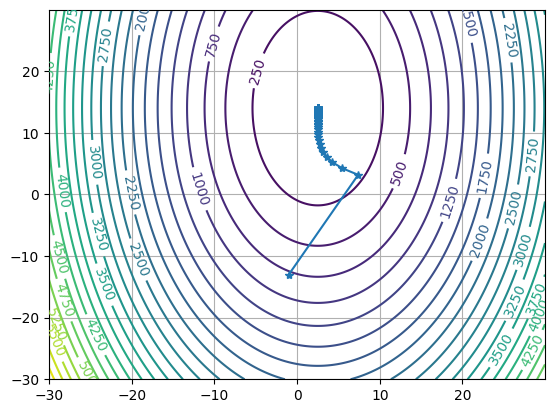

In [21]:
x1_start = -1
x2_start = -13
pogr = 0.001
f_min, x1_ex,x2_ex  = grad_descent(x1_start,x2_start,pogr)
print('Минимум фукции: ', f_min)
print('Коордиаты минимума: ',x1_ex, x2_ex)

step = 0.025
x1 = np.arange(-30.0, 30.0, step)
x2 = np.arange(-30.0, 30.0, step)
X, Y = np.meshgrid(x1, x2)
Z = 4*X**2 - 20*X + Y**2 - 28*Y + 222
CS = plt.contour(X,Y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x1_way,x2_way,marker='*')

# Метод Хука-Дживса

## Функции

In [12]:
def f2(x):
    return 4*x[0]**2 - 20*x[0] + x[1]**2 - 28*x[1] + 222

def rec_first_search(a,b,h):
    global x1_way
    global x2_way
    
    if f(a+h,b)<f(a,b):
        x2_way += [b]
        x1_way += [a+h]
        return rec_first_search(a+h,b,h)
    elif f(a-h,b)<f(a,b):
        x2_way += [b]
        x1_way += [a-h]
        return rec_first_search(a-h,b,h)
    elif f(a,b+h)<f(a,b):
        x1_way += [a]
        x2_way += [b+h]
        return rec_first_search(a,b+h,h)
    elif f(a,b-h)<f(a,b):
        x1_way += [a]
        x2_way += [b-h]
        return rec_first_search(a,b-h,h)
    else:
        x1_way += [a]
        x2_way += [b]
        return (a,b)

def first_search(a,b,h):
    global x1_way
    global x2_way
    temp = 0
    
    if f(a+h,b)<f(a,b):
        x2_way += [b]
        x1_way += [a+h]
        temp = f(a+h,b)
        if f(a+h,b+h)<temp:
            x1_way += [a+h]
            x2_way += [b+h]
            return first_search(a+h,b+h,h)
        elif f(a+h,b-h)<temp:
            x1_way += [a+h]
            x2_way += [b-h]
            return first_search(a+h,b-h,h)
        else: return first_search(a+h,b,h)
    elif f(a-h,b)<f(a,b):
        x2_way += [b]
        x1_way += [a-h]
        temp = f(a-h,b)
        if f(a-h,b+h)<temp:
            x1_way += [a-h]
            x2_way += [b+h]
            return first_search(a-h,b+h,h)
        elif f(a-h,b-h)<temp:
            x1_way += [a-h]
            x2_way += [b-h]
            return first_search(a-h,b-h,h) 
        else: return first_search(a-h,b,h)
    else: return [a,b]
    

def second_search(point1,point2,h):
    n = len(point1)
    point3 = []
    point3 += [point1[i] + 2*(point2[i] - point1[i]) for i in range(n)]

    point4 = first_search(point3[0], point3[1], h)     
    if  point4 != point3:
        return second_search(point2, point4,h)
    else : 
        return rec_first_search(point2[0],point2[1],h)
    

## Поиск минимума

Количество итераций:  377
Минимум фукции:  1.0000000000000284
Коордиаты минимума:  2.5000000000000075 13.999999999999938


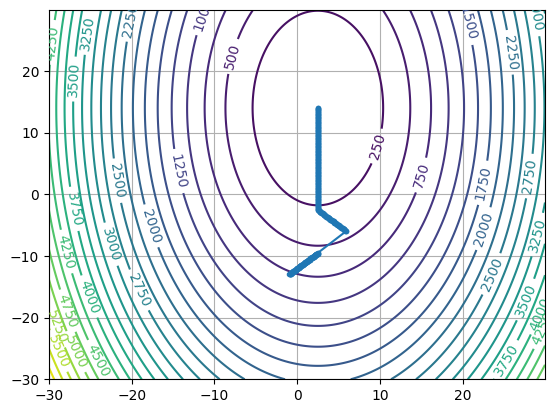

In [20]:
x1_way.clear()
x2_way.clear()
x1_way += [x1_start]
x2_way += [x2_start]
h = 0.1

point1 = [x1_start, x2_start]
point2 = [first_search(x1_start, x2_start,h)[0],first_search(x1_start, x2_start,h)[1]]
x1_ex, x2_ex  = second_search(point1,point2,h)
print('Количество итераций: ', len(x1_way))
print('Минимум фукции: ', f(x1_ex,x2_ex))
print('Коордиаты минимума: ',x1_ex, x2_ex)

step = 0.05
x1 = np.arange(-30.0, 30.0, step)
x2 = np.arange(-30.0, 30.0, step)
X, Y = np.meshgrid(x1, x2)
Z = 4*X**2 - 20*X + Y**2 - 28*Y + 222
CS = plt.contour(X,Y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x1_way,x2_way, marker = '.')

# Метод Неллдера-Мида

## Функции

In [176]:
def nelder_mead(p1, eps, h):
    global triangle
    
    p2 = (p1[0] + h, p1[1])
    p3 = (p1[0], p1[1] - h)
    triangle = [p1]
    triangle += [p2]
    triangle += [p3]
    triangle += [p1]

    while (True):
        adict = {p1:f2(p1), p2:f2(p2), p3:f2(p3)}
        points = sorted(adict.items(), key=lambda elem: elem[1])
        
        b = np.array(points[0][0])
        g = np.array(points[1][0])
        w = np.array(points[2][0])
        mid = (b/2 + g/2)
        
        if evkl_norma(list((b-g)))<eps or evkl_norma(list((b-w)))<eps or evkl_norma(list((g-w)))<eps:
             break
        
        #отражение
        x1 = mid + 2*(mid - w)
        if f2(x1) < f2(g):
            w = x1 
        else:
            if f2(x1) < f2(w):
                w = x1
            c = (w + mid)/2
            if f2(c) < f2(w):
                w = c
        
        if f2(x1) < f2(b):
            #расширение
            x2 = mid + 2 * (x1 - mid)
            if f2(x2) < f2(x1):
                w = x2
            else:
                w = x1
        if f2(x1) > f2(g):
            #сужение
            x3 = mid + 0.5 * (w - mid)
            if f2(x3) < f2(w):
                w = x3
        p1 = tuple(w)
        p2 = tuple(g)
        p3 = tuple(b)
        triangle += [p1]
        triangle += [p2]
        triangle += [p3]
        triangle += [p1]  
    return b

print(len(triangle)/4)

25.0


## Поиск минимума

Количество итераций:  59
Минимум фукции:  1.000001559716452
Коордиаты минимума:  2.5000000000000058 13.998751113915432


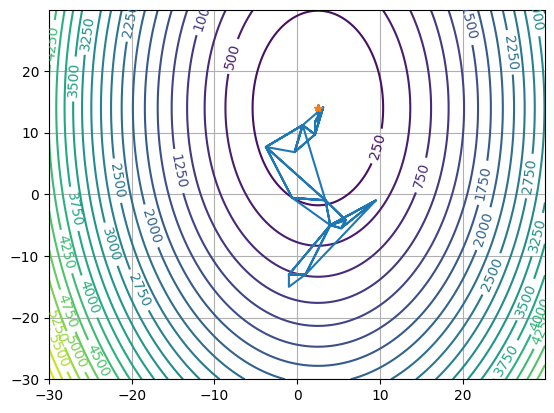

In [186]:
start = (x1_start,x2_start)
x1x_ex ,x2_ex = nelder_mead(start,eps = 0.001,h = 2)
print('Количество итераций: ', len(triangle)//4)
print('Минимум фукции: ', f(x1_ex,x2_ex))
print('Коордиаты минимума: ',x1_ex, x2_ex)

ax = [elem[0] for elem in triangle]
ay = [elem[1] for elem in triangle]

step = 0.05
x1 = np.arange(-30.0, 30.0, step)
x2 = np.arange(-30.0, 30.0, step)
X, Y = np.meshgrid(x1, x2)
Z = 4*X**2 - 20*X + Y**2 - 28*Y + 222
CS = plt.contour(X,Y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(ax,ay)
plt.plot(x1_ex, x2_ex, marker = '*')